In [1]:
from funcoes_arima import read_data
from funcoes_arima import arima_model_plot
from funcoes_arima import sarima_model_plot
from funcoes_arima import autoArima
from funcoes_arima import plot_diffs
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

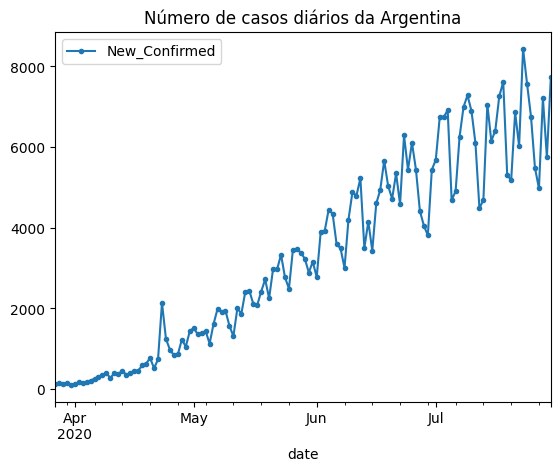

In [2]:
reg_data_mx = read_data('MX')
reg_data_mx = reg_data_mx.loc[reg_data_mx.ge(100).idxmax()[0]:]
reg_data_mx.plot(marker='.')
plt.title('Número de casos diários da México');

In [3]:
print('Total de registros:', len(reg_data_mx))
print('Número de registros para treino:', round(len(reg_data_mx)*0.7, 0))
print('Número de registros para teste:', round(len(reg_data_mx)*0.3, 0))

Total de registros: 126
Número de registros para treino: 88.0
Número de registros para teste: 38.0


In [4]:
train_data = reg_data_mx.iloc[:88]
test_data = reg_data_mx.iloc[88:]
print('Número de registros para treino final:', len(train_data))
print('Número de registros para teste final:', len(test_data))

Número de registros para treino final: 88
Número de registros para teste final: 38


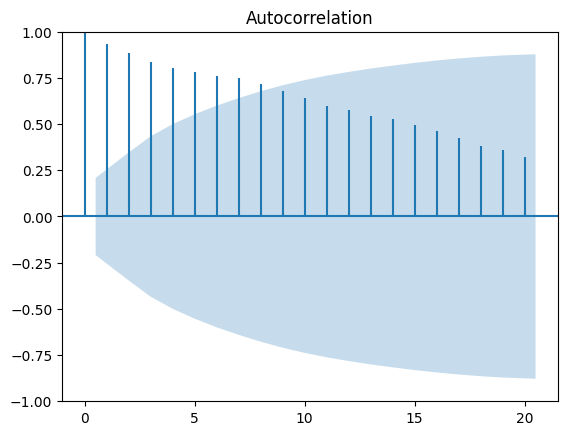

In [5]:
plot_acf(train_data['New_Confirmed'],  marker='');

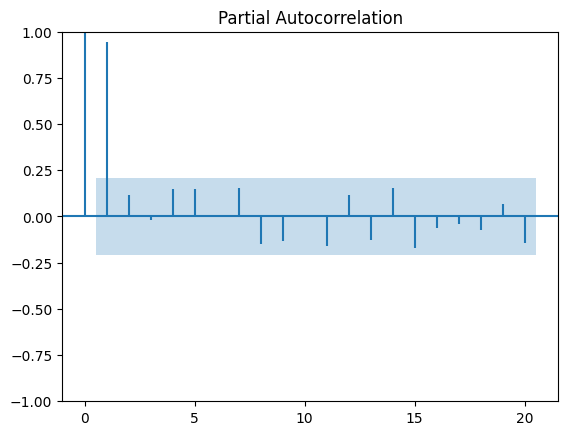

In [6]:
plot_pacf(train_data['New_Confirmed'],  marker='');

ADF Statistic 0 Order: 2.186034
p-value: 0.998871
ADF Statistic 1st Order: -9.191673
p-value: 0.000000
ADF Statistic 2nd Order: -4.692759
p-value: 0.000087
ADF Statistic 3th order: -9.346669
p-value: 0.000000


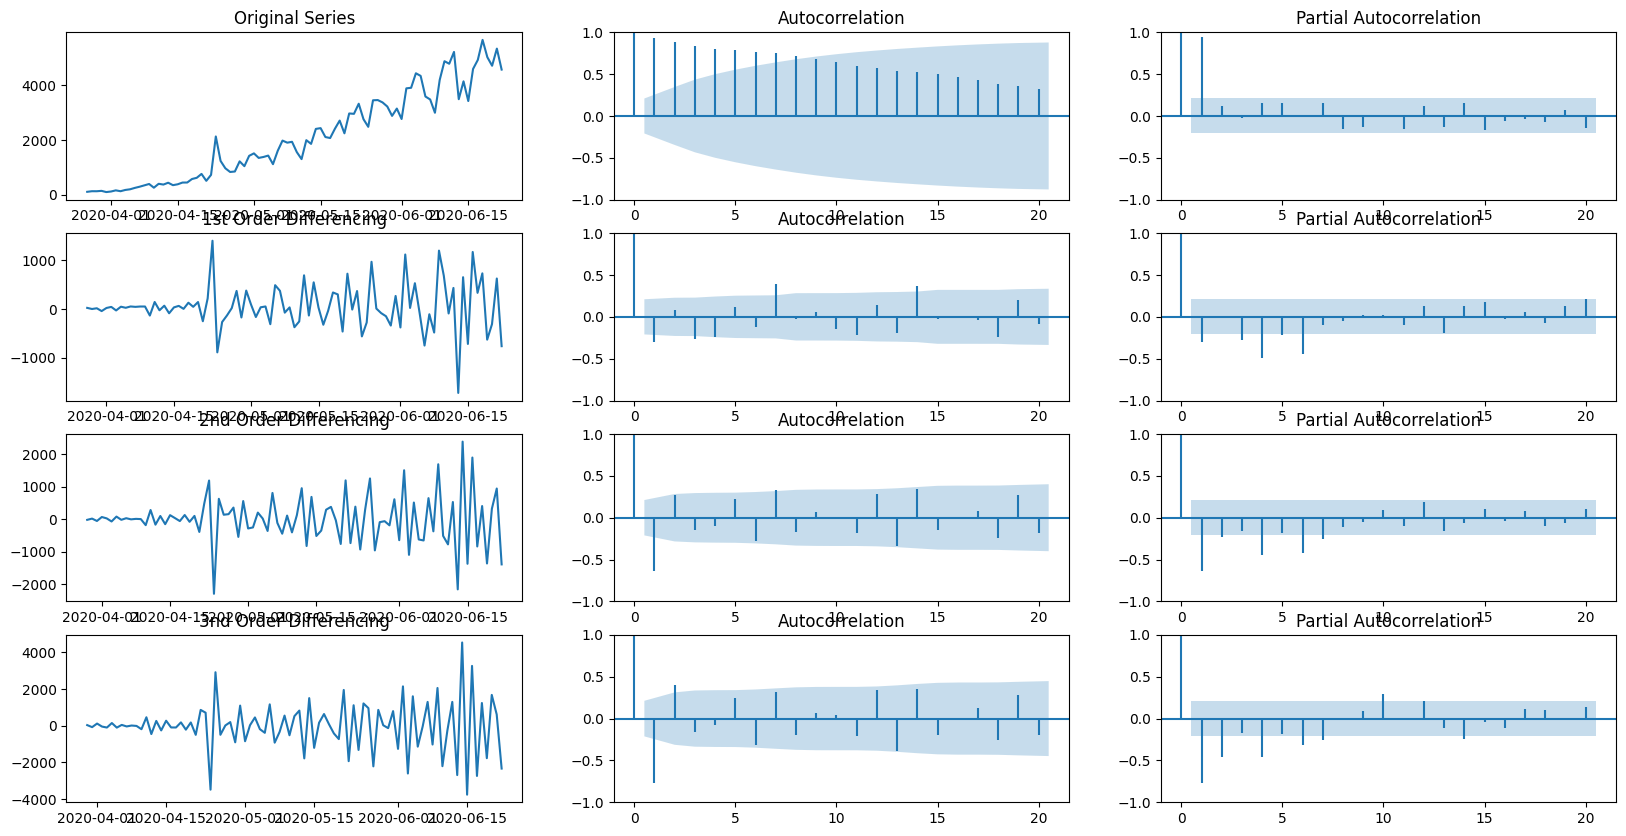

In [7]:
plot_diffs(train_data)

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   88
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -668.076
Date:                Thu, 19 Jan 2023   AIC                           1342.151
Time:                        22:37:22   BIC                           1349.583
Sample:                    03-27-2020   HQIC                          1345.145
                         - 06-22-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2098.2618   1199.191      1.750      0.080    -252.110    4448.634
ar.L1          0.9640      0.032     30.192      0.000       0.901       1.027
sigma2      2.225e+05   2.65e+04      8.406      0.0

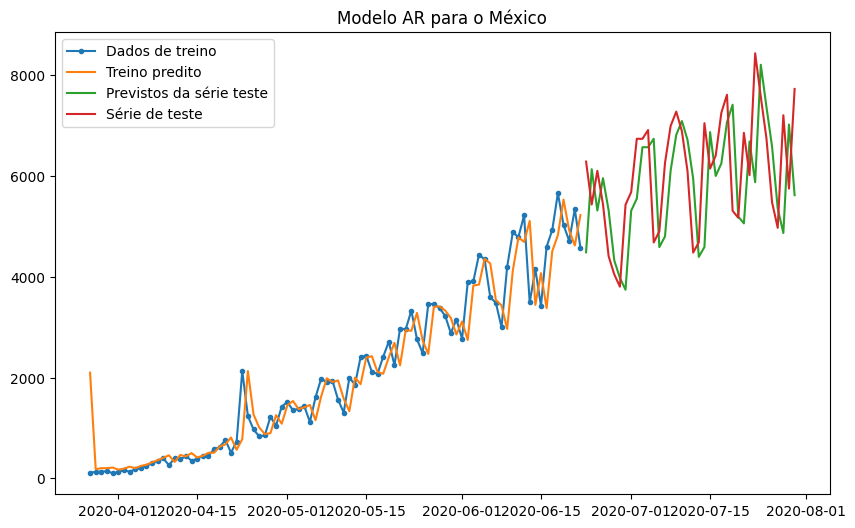

In [8]:
arima_model_plot(train_data, test_data, p=1, model_name='AR', country='México')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   88
Model:                 ARIMA(0, 0, 7)   Log Likelihood                -685.210
Date:                Thu, 19 Jan 2023   AIC                           1388.420
Time:                        22:37:43   BIC                           1410.717
Sample:                    03-27-2020   HQIC                          1397.403
                         - 06-22-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2098.5243    361.562      5.804      0.000    1389.876    2807.172
ma.L1          0.9764      0.488      2.002      0.045       0.020       1.933
ma.L2          0.7758      0.954      0.813      0.4

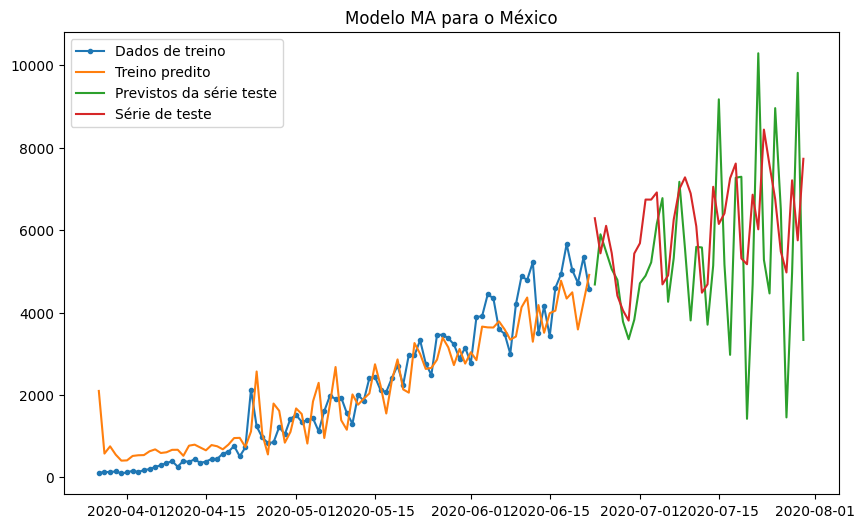

In [9]:
arima_model_plot(train_data, test_data, q=7, model_name='MA', country='México')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   88
Model:                 ARIMA(1, 1, 7)   Log Likelihood                -638.116
Date:                Thu, 19 Jan 2023   AIC                           1294.232
Time:                        22:38:00   BIC                           1316.425
Sample:                    03-27-2020   HQIC                          1303.168
                         - 06-22-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0752      0.305     -0.247      0.805      -0.672       0.522
ma.L1         -0.5102      3.075     -0.166      0.868      -6.536       5.516
ma.L2         -0.0541      0.989     -0.055      0.9

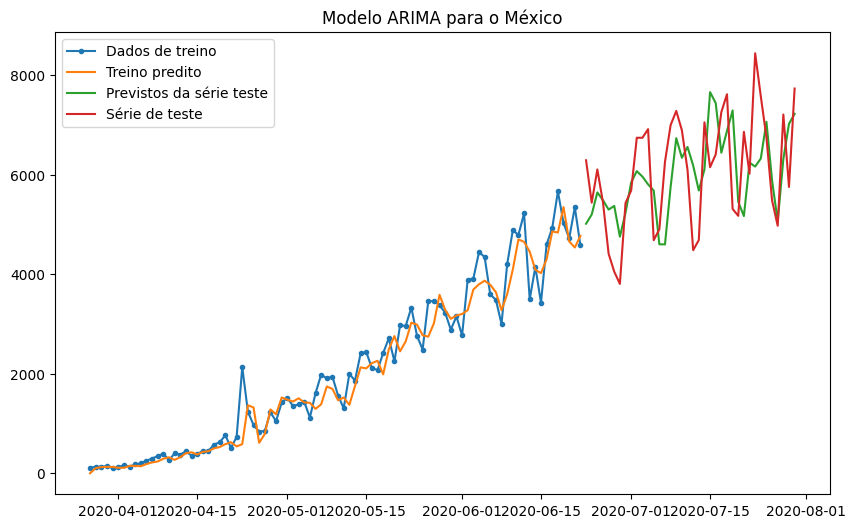

In [10]:
arima_model_plot(train_data, test_data, p=1, d=1, q=7, model_name='ARIMA', country='México')

In [11]:
autoArima(train_data)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

                                    SARIMAX Results                                     
Dep. Variable:                    New_Confirmed   No. Observations:                   88
Model:             ARIMA(1, 1, 1)x(1, 1, [], 7)   Log Likelihood                -580.803
Date:                          Thu, 19 Jan 2023   AIC                           1169.606
Time:                                  22:39:22   BIC                           1179.134
Sample:                              03-27-2020   HQIC                          1173.426
                                   - 06-22-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2113      0.143      1.475      0.140      -0.069       0.492
ma.L1         -0.8842      0.083    -10.637      0.

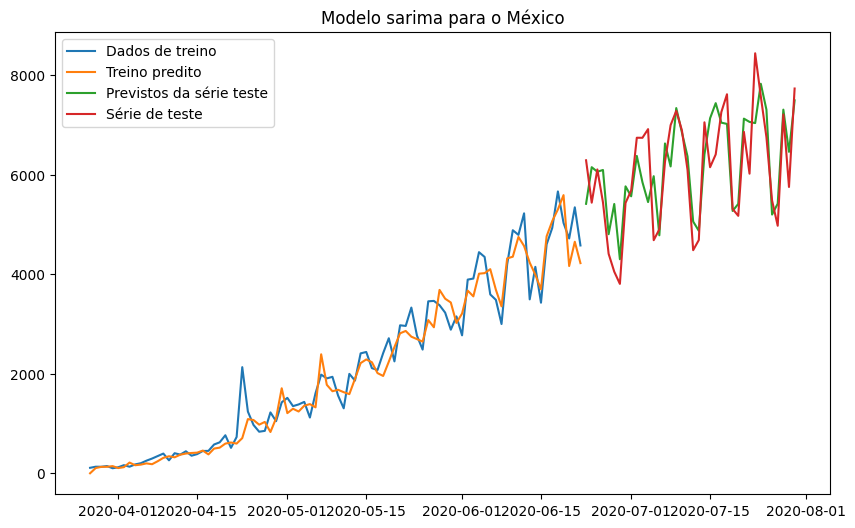

In [15]:
sarima_model_plot(train_data, test_data, p=1, d=1, q=1, P=1, D=1, Q=0, m=7, country='México', model_name='sarima')